In [1]:
!pip install pandas
!pip3 install seaborn
!pip3 install scikit-learn

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [2]:
#Sua resposta aqui
# Carregue o dataset
carros = pd.read_csv('./carros.csv')
display(carros.head(15))
print('\n')
carros.info()
print('\n')
display(carros.isnull().sum())

# Respostas:
# Dados: 38783
# Atributos: 9
# Existem valores faltantes
# float64(2), int64(2), object(5)

carros = carros.dropna(axis = 0)

,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage/1000  4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB




Brand             0
Price           172
Body              0
Mileage/1000      0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [3]:
#Sua resposta aqui
carros = carros.rename(columns={'Mileage/1000':'quilometragem', 'Brand': 'marca', 'Price':'preco','Body':'tipo', 'EngineV':'motor','Engine Type':'combustivel','Registration':'registro','Year':'ano','Model':'modelo' })
carros['quilometragem'] = (carros['quilometragem'] * 1.60934)*1000

display(carros)

,marca,preco,tipo,quilometragem,motor,combustivel,registro,ano,modelo
0,BMW,4200.0,sedan,445787.18,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,687188.18,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,576143.72,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,386241.60,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,193120.80,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,56326.90,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,14484.06,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1609.34,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,312211.96,2.0,Petrol,yes,1985,520


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

<AxesSubplot:>

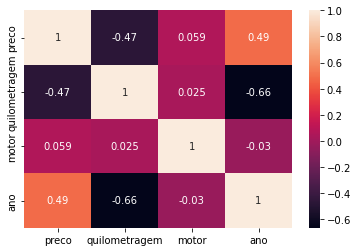

In [4]:
corr = carros.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:title={'center':'preco x motor'}, xlabel='motor', ylabel='preco'>

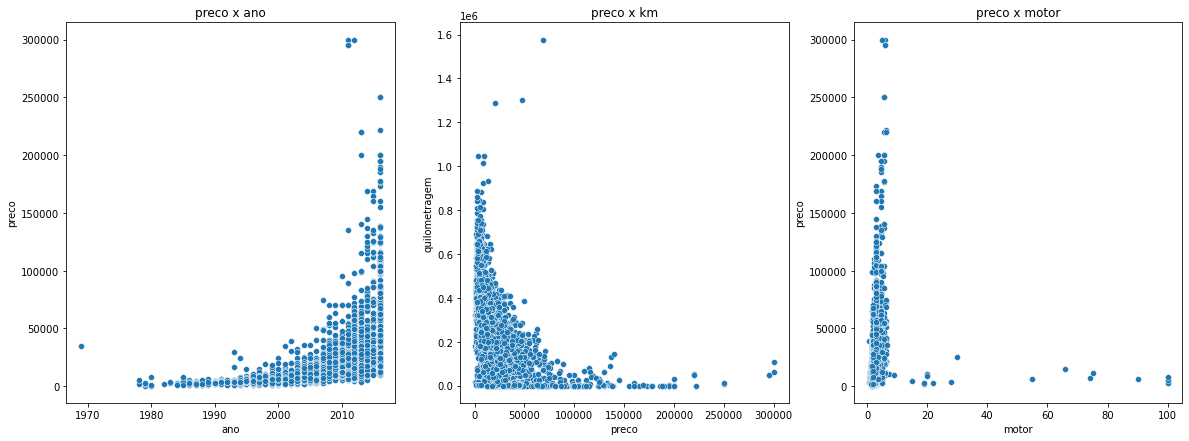

In [5]:
plt.figure(figsize=[20,7])

plt.subplot(1,3,1)
plt.title("preco x ano")
sns.scatterplot(x='ano',y='preco',data=carros)

plt.subplot(1,3,2)
plt.title("preco x km")
sns.scatterplot(x='preco',y='quilometragem',data=carros)

plt.subplot(1,3,3)
plt.title("preco x motor")
sns.scatterplot(x='motor',y='preco',data=carros)

In [6]:
log_price = np.log(carros['preco'])
carros['log_preco'] = log_price
carros = carros.drop('preco',axis=1)

<AxesSubplot:title={'center':'log_preco x motor'}, xlabel='motor', ylabel='log_preco'>

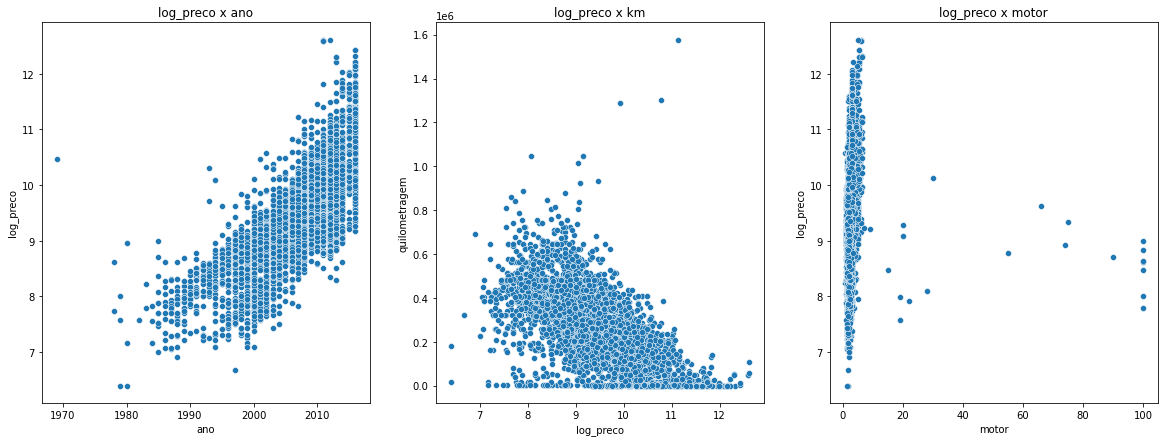

In [7]:
plt.figure(figsize=[20,7])

plt.subplot(1,3,1)
plt.title("log_preco x ano")
sns.scatterplot(x='ano',y='log_preco',data=carros)

plt.subplot(1,3,2)
plt.title("log_preco x km")
sns.scatterplot(x='log_preco',y='quilometragem',data=carros)

plt.subplot(1,3,3)
plt.title("log_preco x motor")
sns.scatterplot(x='motor',y='log_preco',data=carros)

In [8]:
carros_dummies = pd.get_dummies(carros, drop_first=True)

In [9]:
carros_dummies.head()

,quilometragem,motor,ano,log_preco,marca_BMW,marca_Mercedes-Benz,marca_Mitsubishi,marca_Renault,marca_Toyota,marca_Volkswagen,...,modelo_Vito,modelo_X1,modelo_X3,modelo_X5,modelo_X5 M,modelo_X6,modelo_X6 M,modelo_Yaris,modelo_Z3,modelo_Z4
0,445787.18,2.0,1991,8.342840,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,687188.18,2.9,1999,8.974618,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,576143.72,5.0,2003,9.495519,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,386241.60,4.2,2007,10.043249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,193120.80,2.0,2011,9.814656,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta: modelos de regressão,  porque eles são projetados para encontrar relações entre variáveis contínuas, como o preço do carro e suas características, e prever um valor contínuo como resultado.

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta: A técnica sugerida para o seu projeto é a Regressão Linear Múltipla, que é um modelo simples e amplamente utilizado para prever o preço do carro com base em suas características. Esse modelo é fácil de entender e permite analisar como cada característica do carro afeta o preço. Também é um bom ponto de partida para comparar a performance de modelos mais complexos, como RandomForestRegressor e GradientBoostingRegressor.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: RandomForestRegressor

Algoritmo 2: GradientBoostingRegressor

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [10]:
#Sua resposta aqui
x = carros_dummies.drop('log_preco', axis = 1)
y = carros_dummies['log_preco']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=2, random_state=365)

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [11]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(x_train, y_train)

rf_r2 = r2_score(y_test, rf.predict(x_test))
rf_rmse = mean_squared_error(y_test, rf.predict(x_test), squared=False)

print("Random Forest R2-score: {:.2f}".format(rf_r2))
print("Random Forest RMSE: {:.2f}".format(rf_rmse))

Random Forest R2-score: 0.98
Random Forest RMSE: 0.09


7.2 - Algoritmo 2:  (0,5)

In [13]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(x_train, y_train)

gb_r2 = r2_score(y_test, gb.predict(x_test))
gb_rmse = mean_squared_error(y_test, gb.predict(x_test), squared=False)

print("Gradient Boosting R2-score: {:.2f}".format(gb_r2))
print("Gradient Boosting RMSE: {:.2f}".format(gb_rmse))

Gradient Boosting R2-score: 0.95
Gradient Boosting RMSE: 0.13


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta: RandomForestRegressor teve um melhor resultado por conta que teve um R2-score maior e um RMSE menor, o que significa ter uma precisão melhor

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [14]:
#nova_linha = {'marca':'Volkswagen', 'tipo': 'sedan', 'quilometragem': 172095,'motor': 2.0,'combustivel': 'Gas','registro': 'yes','ano': 2005,'modelo': 'Polo'}
carros_teste = carros.to_dict('records')
carros_teste.append({'marca':'Volkswagen', 'tipo': 'sedan', 'quilometragem': 172095,'motor': 2.0,'combustivel': 'Gas','registro': 'yes','ano': 2005,'modelo': 'Polo'})
carros_teste = pd.DataFrame(carros_teste)
carros_teste_dummies = pd.get_dummies(carros_teste, drop_first=True)
nova_linha = carros_teste_dummies.tail(1)
nova_linha = nova_linha.to_dict('records')[0]
nova_linha_df = pd.DataFrame(nova_linha, index=[0])
nova_linha_df = nova_linha_df.drop('log_preco', axis = 1)

In [15]:
# Fazer previsões para uma nova linha de dados
previsao = rf.predict(nova_linha_df)

preco = previsao[0]

preco = np.e**preco

In [16]:
print(f'O preço predizido foi de US {preco:.2f}')

O preço predizido foi de US 9129.36
